<a href="https://colab.research.google.com/github/ishantinsights/projects/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=orange>Problem Statement:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

<font color=orange>Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.

User_ID: User ID

● Product_ID: Product ID

● Gender: Sex of User

● Age: Age in bins

● Occupation: Occupation

● City_Category: Category of the City (A,B,C)

● StayInCurrentCityYears: Number of years stay in current city

● Marital_Status: Marital Status

● ProductCategory: Product Category

● Purchase: Purchase Amount

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Section 1 : Basic Data Checks



1.   Shape of the Data
2.   Check for Data types
3.   Check for null values
4.   Check for duplicate values
5.   Check for outliers
6.   Statistical Summary




In [ ]:
walmart=pd.read_csv("/content/walmart_data.txt")
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
walmart.shape

(550068, 10)

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart['Product_Category']=walmart['Product_Category'].astype('str')
walmart['Occupation']=walmart['Occupation'].astype('str')
walmart['Marital_Status']=walmart['Marital_Status'].astype('str')

In [ ]:
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Voila! no null values

In [ ]:
walmart.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

No Duplicate rows

<Axes: ylabel='Purchase'>

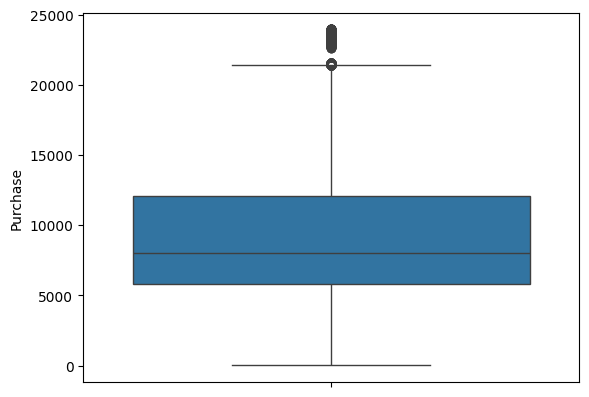

In [ ]:
sns.boxplot(data=walmart,y=walmart['Purchase']) # to check the outliers

In [ ]:
# Let's fix this thing using clip function
percentile_fifth=walmart['Purchase'].quantile(0.05)

In [ ]:
percentile_ninetyfive=walmart['Purchase'].quantile(0.95)
percentile_ninetyfive

19336.0

<Axes: ylabel='Purchase'>

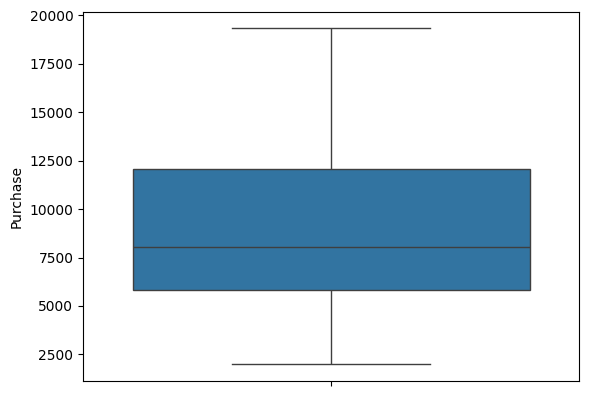

In [ ]:
walmart['Purchase'].clip(percentile_fifth,percentile_ninetyfive,inplace=True)
# lets check for outliers now
sns.boxplot(data=walmart,y=walmart['Purchase']) ## Boom no outliers fantastic!

In [ ]:
walmart.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9256.710489
std,1.727592e+03,4855.947166
min,1.000001e+06,1984.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,19336.000000


# **Section 2 - Data Exploration**



1.   Univariate Analysis
2.   Multivariate Analysis



In [ ]:
walmart['Age'].value_counts(normalize=True)

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64

<font color=orange>Observations:





40% of the users are in age bracket 26-35







In [ ]:
walmart['Gender'].value_counts(normalize=True)

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64

<font color=orange>Observations

75% of the customers are males and 25% females

In [ ]:
walmart['Marital_Status'].value_counts(normalize=True)

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

<font color=orange>Observations:

60% are single and 40% married

In [ ]:
walmart['City_Category'].value_counts(normalize=True)

City_Category
B    0.420263
C    0.311189
A    0.268549
Name: proportion, dtype: float64

<font color=orange> Observations

42% of the customers are from B city category

# **UNIVARIATE ANALYSIS**

<Axes: xlabel='Marital_Status', ylabel='count'>

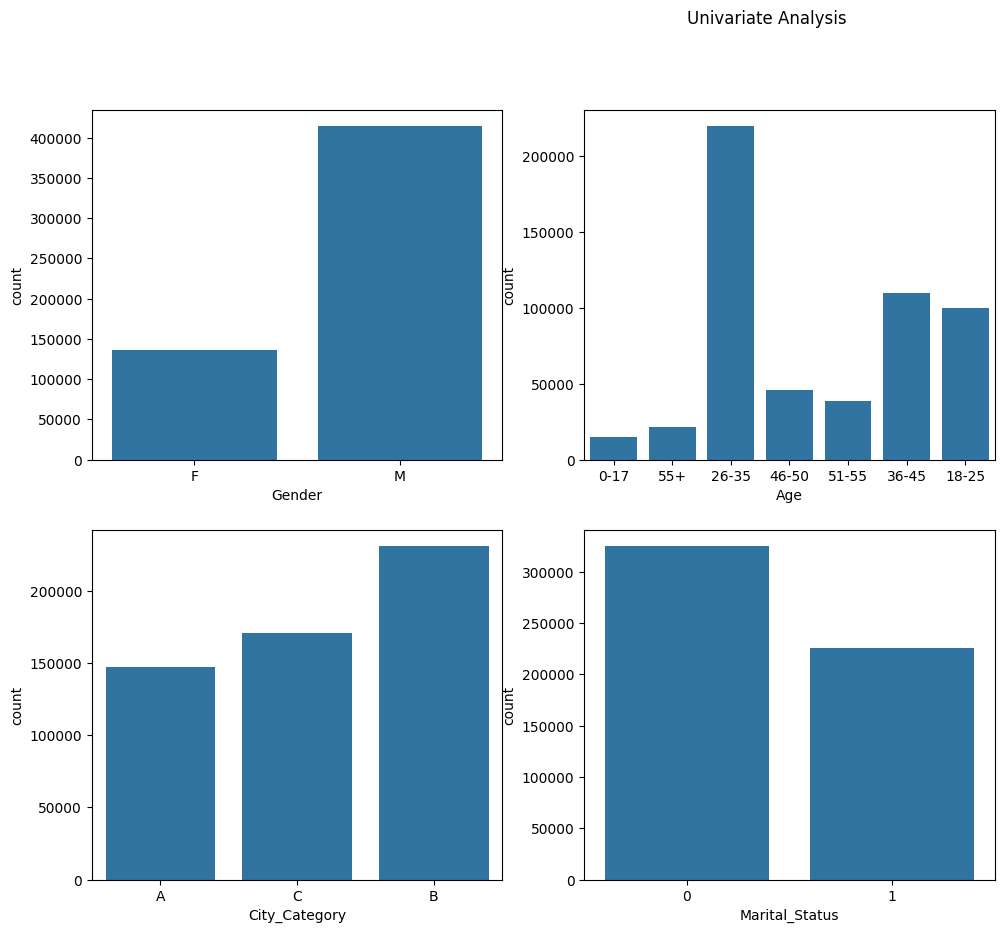

In [ ]:
plt.figure(figsize=(18,10)).suptitle("Univariate Analysis")

plt.subplot(2,3,1)
sns.countplot(data=walmart,x='Gender')
plt.subplot(2,3,2)
sns.countplot(data=walmart,x='Age')
plt.subplot(2,3,4)
sns.countplot(data=walmart,x='City_Category')
plt.subplot(2,3,5)
sns.countplot(data=walmart,x='Marital_Status')

# **BIVARIATE ANALYSIS**

<Axes: xlabel='Age', ylabel='Purchase'>

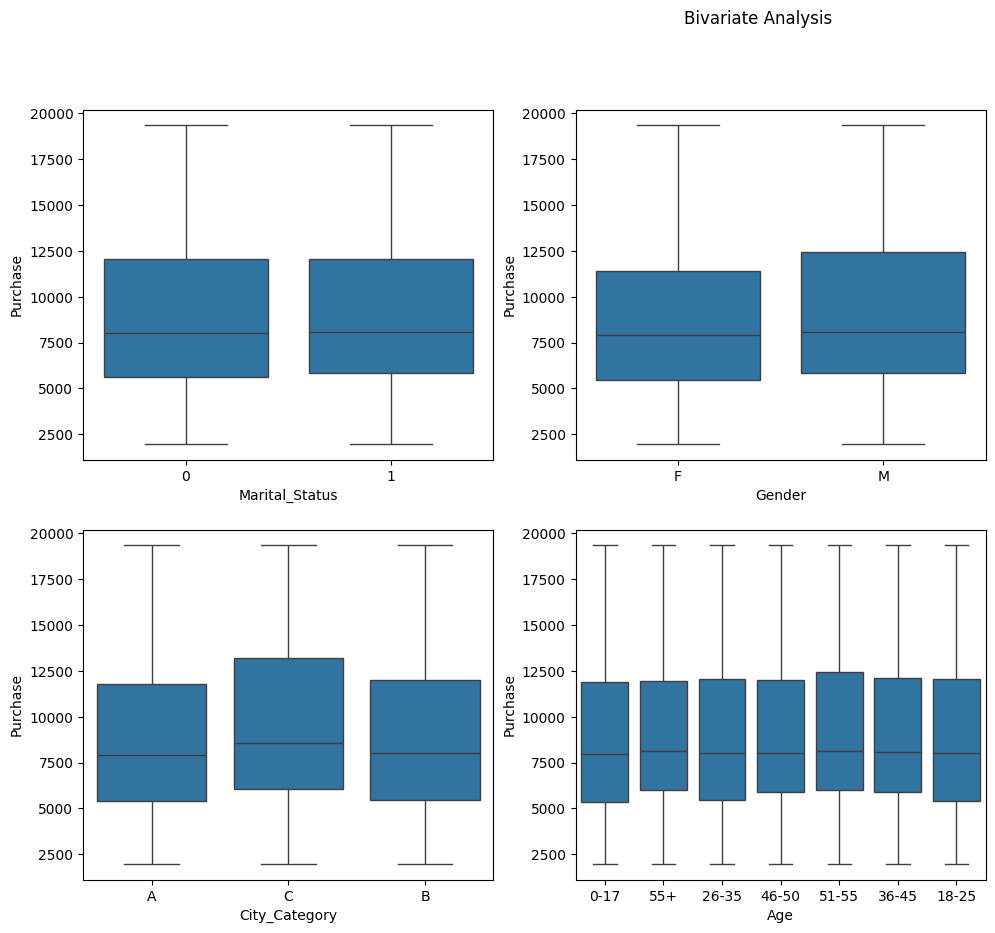

In [ ]:
plt.figure(figsize=(18,10)).suptitle("Bivariate Analysis")
plt.subplot(2,3,1)
sns.boxplot(data=walmart,y='Purchase',x='Marital_Status')
plt.subplot(2,3,2)
sns.boxplot(data=walmart,y='Purchase',x='Gender')
plt.subplot(2,3,4)
sns.boxplot(data=walmart,y='Purchase',x='City_Category')
plt.subplot(2,3,5)
sns.boxplot(data=walmart,y='Purchase',x='Age')

<font color=orange>Observations:





Both married and singles avg spent is same i.e Rs 7600

Both the gender spent equally as median purchase amount is almost same - i.e Rs 7600

All the three city category spent equally not much of difference as median spent is same i.e Rs 7600-7700

Median purchase amount across all the age groups is almost same i.e 7600






<Axes: xlabel='Product_Category', ylabel='Gender'>

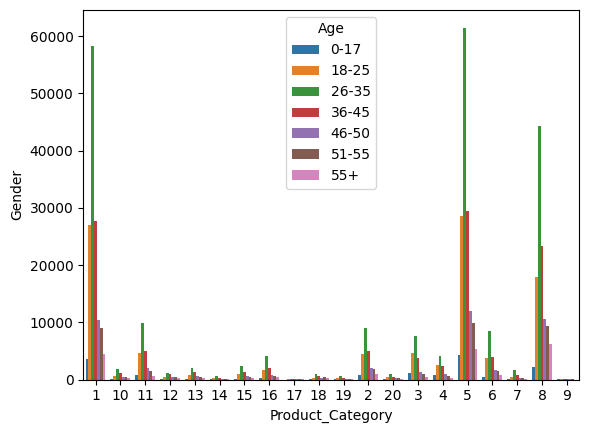

In [ ]:
temp=walmart.groupby(by=['Age','Product_Category'])['Gender'].count().reset_index()
sns.barplot(data=temp,y='Gender',x='Product_Category',hue='Age')


Observation:

In every product category age group 26-35 is dominating followed by 36-45 and 18-25

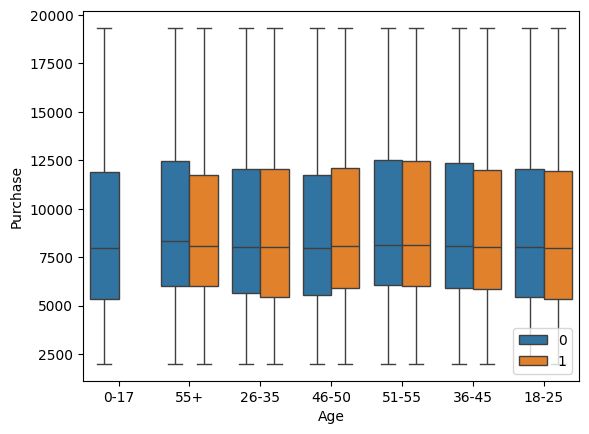

In [ ]:
sns.boxplot(data=walmart,x="Age",y="Purchase",hue='Marital_Status')
plt.legend(loc='lower right') # 0 means Single , 1 means Married


<font color=orange>Observation:


Median purchase amount across all the age groups and across single and married buyers is almost same i.e ~7700

<Axes: xlabel='Product_Category', ylabel='count'>

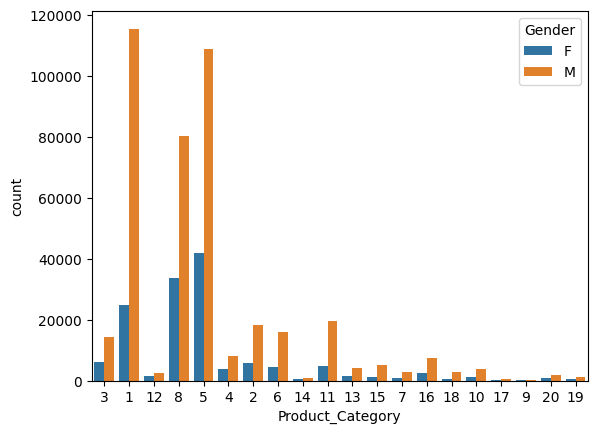

In [ ]:
sns.countplot(data=walmart,x='Product_Category',hue='Gender')

<font color=orange>Observation:

Across all product category Males are the most buyers

# **Section 3:**
In this section we will analyse how various factor affect the amount spent and using CLT we will determine the range of population mean basis different sample size

3.1.  Affect of Gender on Amount Spent

3.2.  Affect of Marital Status on Amount Spent

3.3.  Affect of Age on Amount Spent



# **#How does gender affect the amount spent?**

In [ ]:
walmart.groupby(by='Gender')['Purchase'].mean()

Gender
F    8736.540266
M    9427.240997
Name: Purchase, dtype: float64

Observation: Average spend of Males is more than Females

In [ ]:
# Confidence Interval calculation of purchase amount for both the genders at 95% confidence for different sample sizes 300,3000,30000

# **CONFIDENCE INTERVAL CALCULATION FOR MALE @ 95% confidence level**

for sample size n1=300,n2=3000,n3=30000




In [ ]:
#Sample Size n1=300
#C.I = point estimate +- margin of error
#margin of error = Z(alpha/2)* Std_deviation/sqrt(sample size)
Male=walmart[walmart['Gender']=='M']
np.random.seed(123)
point_estimate=Male['Purchase'].sample(300).mean() # sample mean
n1=300  #Sample Size
std_dev=Male['Purchase'].std()
std_error=std_dev/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate,scale=std_error)

(9056.242796807466, 10171.070536525865)

<font color=orange>Observation:


The average purchase amount for entire Male population buyers lies between 9056  and  10171 with 95% confidence w.r.t sample size 300

<Axes: ylabel='Count'>

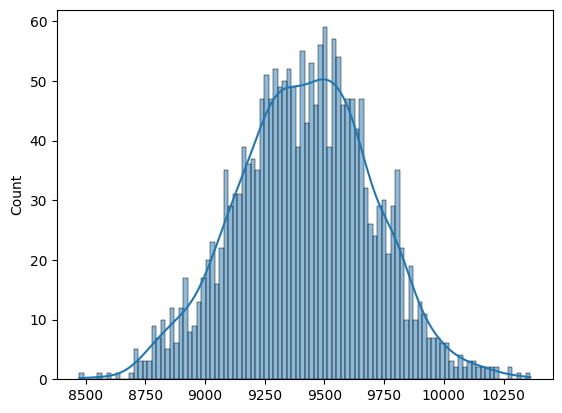

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean=[]
for i in range(2000):
  sample_mean=Male['Purchase'].sample(300).mean()
  s_mean.append(sample_mean)

sns.histplot(data=s_mean,bins=100,kde=True)

<font color=orange>Observation:

So graph shows kind of normal distribution for sample size 300 , repeated 2000 times

In [ ]:
#Sample Size n2=3000
np.random.seed(123)
point_estimate2=Male['Purchase'].sample(3000).mean() # sample mean
n2=3000  #Sample Size
std_error2=std_dev/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate2,scale=std_error2)

(9245.921257187625, 9598.460742812376)

<font color=orange>Observation:

The average purchase amount for entire Male population buyers lies between 9245 and 9598 with 95% confidence , as clearly visible with increase in sample size to 3000 the C.I gets more and more accurate and closer to population mean

<Axes: ylabel='Count'>

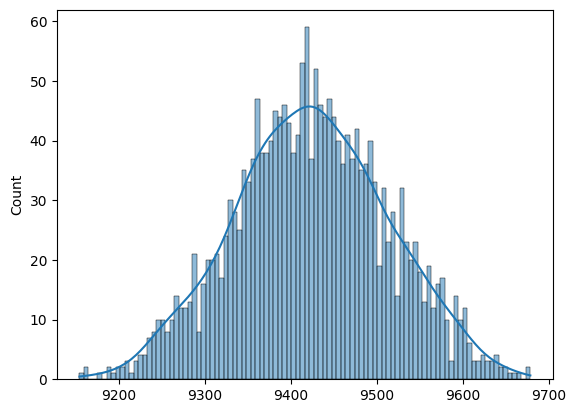

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean2=[]
for i in range(2000):
  sample_mean2=Male['Purchase'].sample(3000).mean()
  s_mean2.append(sample_mean2)

sns.histplot(data=s_mean2,bins=100,kde=True)

<font color=orange>Observation:

Clearly with larger sample size of 3000 we can observe lower spread of data as compared to sample size of 300 which means sample size effects the C.I


<Axes: ylabel='Count'>

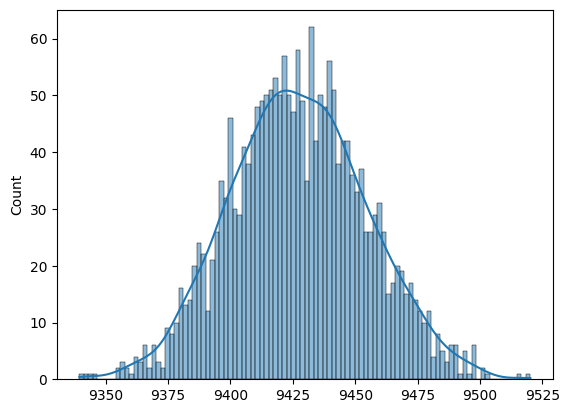

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 30000
s_mean3=[]
for i in range(2000):
  sample_mean3=Male['Purchase'].sample(30000).mean()
  s_mean3.append(sample_mean3)

sns.histplot(data=s_mean3,bins=100,kde=True)

<font color=orange>Observation:

Clearly with larger sample size of 30000 we can observe lower spread of data as compared to sample size of 3000 which means sample size effects the C.I

In [ ]:
#lets calculate the C.I with sample size 30000
#Sample Size n3=3000
np.random.seed(12345)
point_estimate3=Male['Purchase'].sample(30000).mean() # sample mean
n3=30000  #Sample Size
std_error3=std_dev/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate3,scale=std_error3)

(9340.915346347414, 9452.398120319252)

<font color=orange>Observation:

The average purchase amount for entire Male population buyers lies between 9340 and 9452 with 95% confidence , as clearly visible with increase in sample size to 30000 the
C.I gets more and more accurate and closer to population mean

# **CONFIDENCE INTERVAL CALCULATION FOR FEMALE @ 95% confidence level**

In [ ]:
female=walmart[walmart['Gender']=='F']
std_dev2=female['Purchase'].std()

<Axes: ylabel='Count'>

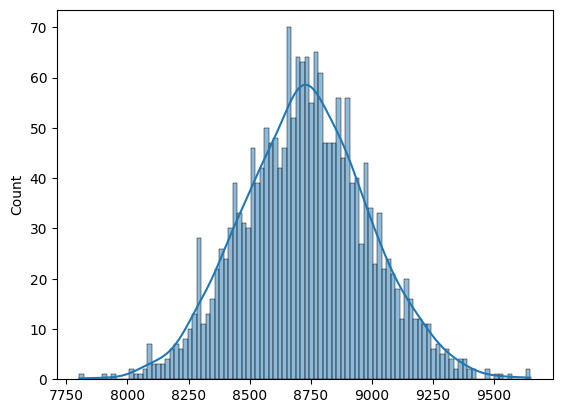

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean4=[]
for i in range(2000):
  sample_mean4=female['Purchase'].sample(300).mean()
  s_mean4.append(sample_mean4)

sns.histplot(data=s_mean4,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate4=female['Purchase'].sample(300).mean() # sample mean
std_error4=std_dev2/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate4,scale=std_error4)


(8124.89511249034, 9165.271554176328)

<Axes: ylabel='Count'>

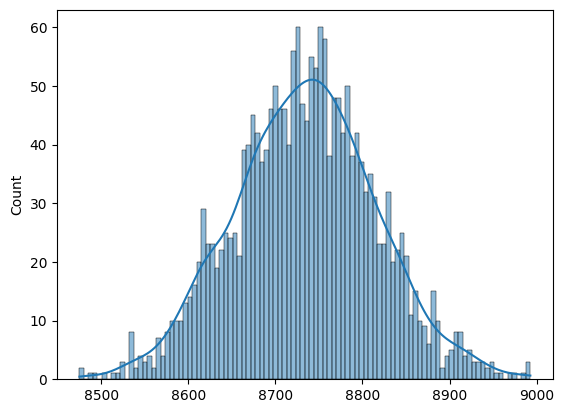

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean5=[]
for i in range(2000):
  sample_mean5=female['Purchase'].sample(3000).mean()
  s_mean5.append(sample_mean5)

sns.histplot(data=s_mean5,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate5=female['Purchase'].sample(3000).mean() # sample mean
std_error5=std_dev2/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate5,scale=std_error5)


(8540.963374347879, 8869.959292318787)

<Axes: ylabel='Count'>

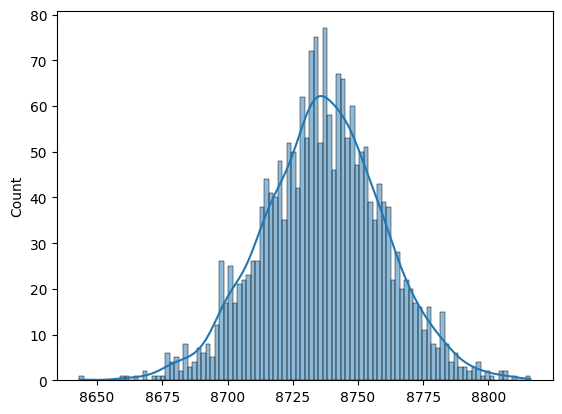

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 30000
s_mean6=[]
for i in range(2000):
  sample_mean6=female['Purchase'].sample(30000).mean()
  s_mean6.append(sample_mean6)

sns.histplot(data=s_mean6,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate6=female['Purchase'].sample(30000).mean() # sample mean
std_error6=std_dev2/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate6,scale=std_error6)

(8679.766877915701, 8783.8045220843)

<font color=orange>Observations for females group w.r.t to purchase amount for diff sample sizes:

C.I of Purchase amount when sample size is 300 lies in the range: 8124 - 9165

C.I of Purchase amount when sample size is 3000 lies in the range: 8540 - 8869

C.I of Purchase amount when sample size is 30000 lies in the range : 8679 - 8783

C.I of different sample sizes overlap



<font color=orange># **SUMMARY OF C.I @ 95% BASIS GENDER:**

Average amount spent by Male population @95% C.I is in the range : 9340 - 9452

Average amount spent by Female population @95% C.I is in the range : 8679 - 8783

<font color=pink> So it clearly visible that C.I does not overlap for male and females





# **How does Marital Status affect the amount spent?**

In [ ]:
walmart['Marital_Status2']=walmart['Marital_Status'].astype('int')

In [ ]:
def marital_status_category(x):
  if x==0:
    return 'single'
  else:
    return "married"
walmart['marital_category']=walmart['Marital_Status2'].apply(marital_status_category)


In [ ]:
walmart.groupby(['marital_category'])['Purchase'].mean()

marital_category
married    9253.669823
single     9258.820464
Name: Purchase, dtype: float64

# **CONFIDENCE INTERVAL CALCULATION FOR MARRIED @ 95% confidence level**

<Axes: ylabel='Count'>

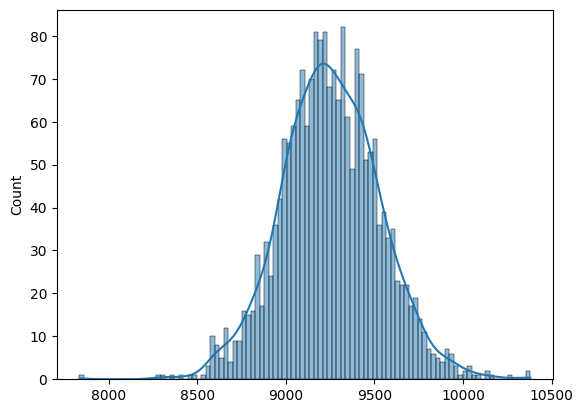

In [ ]:
married=walmart[walmart['marital_category']=='married']
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean7=[]
for i in range(2000):
  sample_mean7=married['Purchase'].sample(300).mean()
  s_mean7.append(sample_mean7)

sns.histplot(data=s_mean7,bins=100,kde=True)

<font color=orange>Observation:

So graph shows kind of normal distribution for sample size 300 , repeated 2000 times . This is sampling distribution of sample means , with spread of purchase amount  b/w 8000 to 10500

In [ ]:
np.random.seed(123)
point_estimate7=married['Purchase'].sample(n1).mean()
std_error7=std_dev2/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate7,scale=std_error7)

(8297.445112490339, 9337.821554176327)

<Axes: ylabel='Count'>

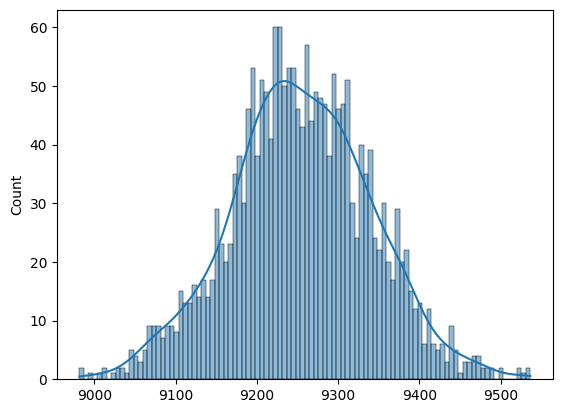

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean8=[]
for i in range(2000):
  sample_mean8=married['Purchase'].sample(3000).mean()
  s_mean8.append(sample_mean8)

sns.histplot(data=s_mean8,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate8=married['Purchase'].sample(n2).mean()
std_error8=std_dev2/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate8,scale=std_error8)

(9018.041041014547, 9347.036958985454)

<Axes: ylabel='Count'>

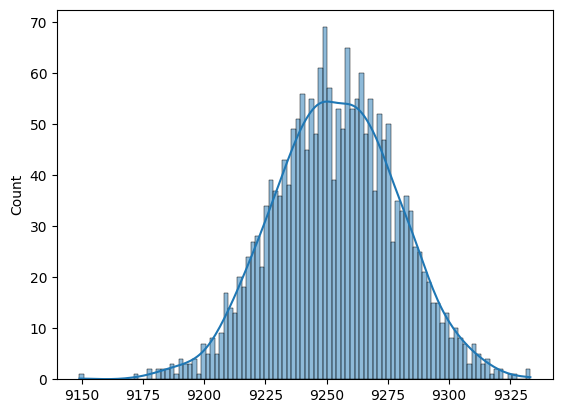

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 30000
s_mean9=[]
for i in range(2000):
  sample_mean9=married['Purchase'].sample(30000).mean()
  s_mean9.append(sample_mean9)

sns.histplot(data=s_mean9,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate9=married['Purchase'].sample(n3).mean()
std_error9=std_dev2/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate9,scale=std_error9)

(9169.689244582367, 9273.726888750965)

<font color=orange>Observation for Married group :

Average purchase amount at 95% Confidence Level lies in the range : 9169 - 9273





# **CONFIDENCE INTERVAL CALCULATION FOR SINGLES @ 95% confidence level**

In [ ]:
Single=walmart[walmart['marital_category']=='single']
std_dev3=Single['Purchase'].std()

<Axes: ylabel='Count'>

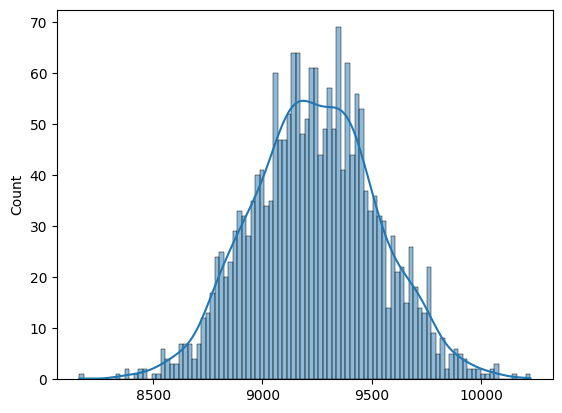

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean10=[]
for i in range(2000):
  sample_mean10=Single['Purchase'].sample(n1).mean()
  s_mean10.append(sample_mean10)

sns.histplot(data=s_mean10,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate10=Single['Purchase'].sample(n1).mean()
std_error10=std_dev3/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate10,scale=std_error10)

(8784.964233796021, 9885.902432870644)

<Axes: ylabel='Count'>

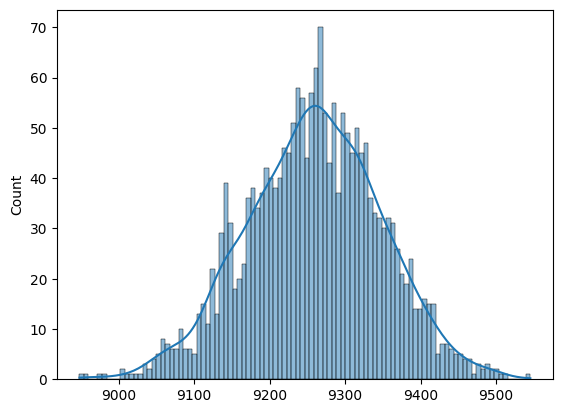

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size n2=3000
s_mean11=[]
for i in range(2000):
  sample_mean11=Single['Purchase'].sample(n2).mean()
  s_mean11.append(sample_mean11)

sns.histplot(data=s_mean11,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate11=Single['Purchase'].sample(n2).mean()
std_error11=std_dev3/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate11,scale=std_error11)

(9065.013719725348, 9413.160946941318)

<Axes: ylabel='Count'>

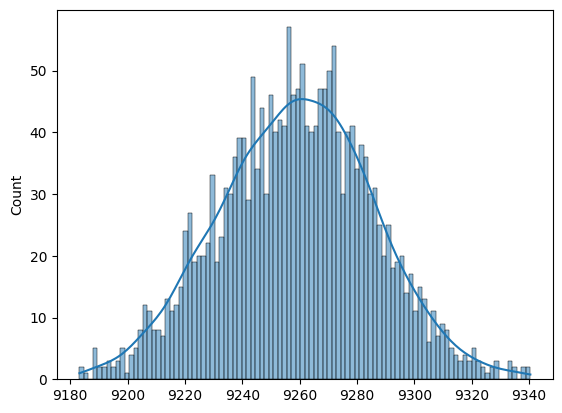

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size n3=30000
s_mean12=[]
for i in range(2000):
  sample_mean12=Single['Purchase'].sample(n3).mean()
  s_mean12.append(sample_mean12)

sns.histplot(data=s_mean12,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 30000
#Sample Size n3=3000
np.random.seed(123)
point_estimate12=Single['Purchase'].sample(n3).mean()
std_error12=std_dev3/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate12,scale=std_error12)

(9218.82079004627, 9328.914609953732)

<font color=orange>Observation for SINGLES group :

Average purchase amount at 95% Confidence Level lies in the range : 9218 - 9328

<font color=orange># **SUMMARY OF C.I @ 95% Marital Status:**

Average amount spent by Married population @95% confidence is in the range : 9169 - 9273

Average amount spent by Female population @95% confidence is in the range : 9218 - 9328

<font color=pink> So it clearly visible that C.I do overlap for Married and Singles




# **How does Age affect the amount spent?**

In [ ]:
Age_17=walmart[walmart['Age']=="0-17"]
walmart.groupby('Age')['Purchase'].mean()

Age
0-17     8940.649053
18-25    9169.010977
26-35    9243.780119
36-45    9322.921909
46-50    9204.211483
51-55    9514.863250
55+      9327.796549
Name: Purchase, dtype: float64

In [ ]:
std_dev_17=Age_17['Purchase'].std()

<Axes: ylabel='Count'>

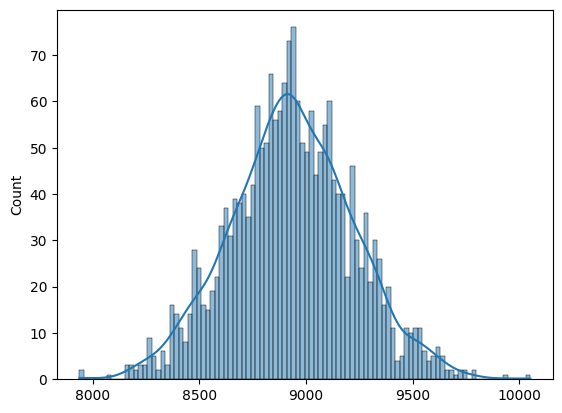

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean13=[]
for i in range(2000):
  sample_mean13=Age_17['Purchase'].sample(300).mean()
  s_mean13.append(sample_mean13)

sns.histplot(data=s_mean13,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 300
#Sample Size n1=300
np.random.seed(134589)
point_estimate13=Age_17['Purchase'].sample(n1).mean()
std_error13=std_dev_17/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate13,scale=std_error13)

(8428.669062955278, 9546.810937044722)

<Axes: ylabel='Count'>

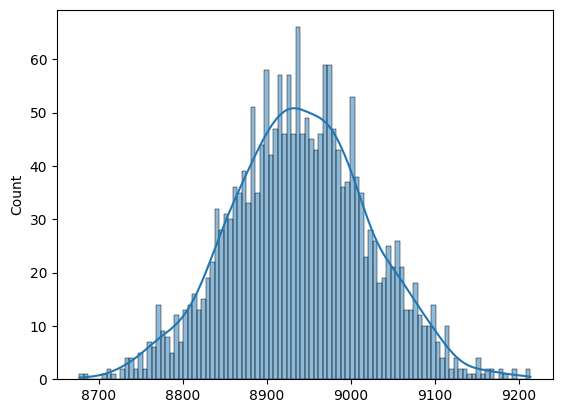

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean14=[]
for i in range(2000):
  sample_mean14=Age_17['Purchase'].sample(3000).mean()
  s_mean14.append(sample_mean14)

sns.histplot(data=s_mean14,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(1345289)
point_estimate14=Age_17['Purchase'].sample(n2).mean()
std_error14=std_dev_17/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate14,scale=std_error14)

(8847.239246533407, 9200.826753466592)

In [ ]:
Age_25=walmart[walmart['Age']=="18-25"]
std_dev_25=Age_25['Purchase'].std()

<Axes: ylabel='Count'>

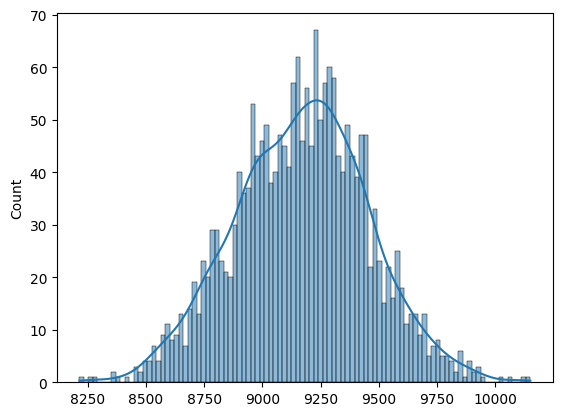

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean15=[]
for i in range(2000):
  sample_mean15=Age_25['Purchase'].sample(300).mean()
  s_mean15.append(sample_mean15)

sns.histplot(data=s_mean15,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 300
#Sample Size n1=300
np.random.seed(134289)
point_estimate15=Age_25['Purchase'].sample(n1).mean()
std_error15=std_dev_25/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate15,scale=std_error15)

(8849.792332321516, 9956.354334345151)

<Axes: ylabel='Count'>

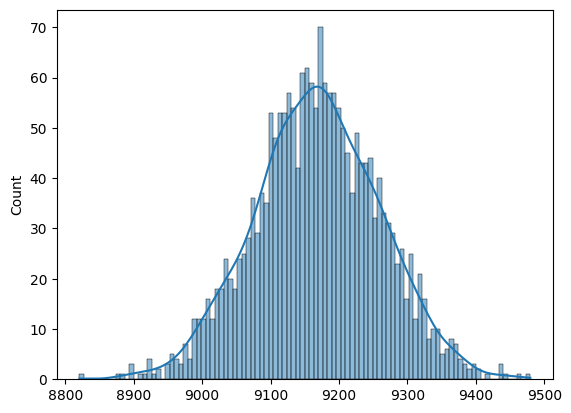

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean16=[]
for i in range(2000):
  sample_mean16=Age_25['Purchase'].sample(3000).mean()
  s_mean16.append(sample_mean16)

sns.histplot(data=s_mean16,bins=100,kde=True)

In [ ]:
#lets calculate the C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(1342489)
point_estimate16=Age_25['Purchase'].sample(n2).mean()
std_error16=std_dev_25/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate16,scale=std_error16)

(9063.682851737141, 9413.608481596193)

In [ ]:
Age_35=walmart[walmart['Age']=="26-35"]
std_dev_35=Age_35['Purchase'].std()

4855.192053150139

<Axes: ylabel='Count'>

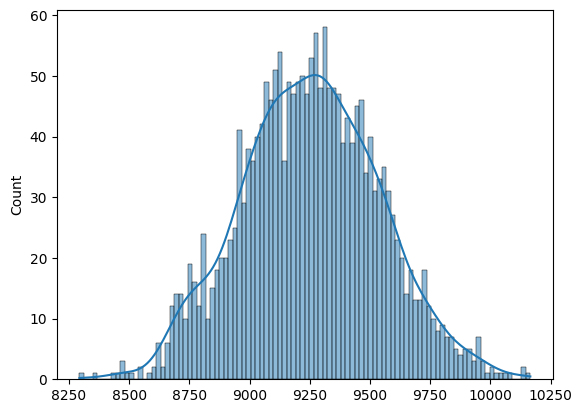

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 300
s_mean17=[]
for i in range(2000):
  sample_mean17=Age_35['Purchase'].sample(300).mean()
  s_mean17.append(sample_mean17)

sns.histplot(data=s_mean17,bins=100,kde=True)

In [ ]:
#lets calculate the 95% C.I with sample size 300
#Sample Size n1=300
np.random.seed(1342890)
point_estimate17=Age_35['Purchase'].sample(n1).mean()
std_error17=std_dev_35/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate17,scale=std_error17)

(8285.540060312198, 9384.353273021135)

<Axes: ylabel='Count'>

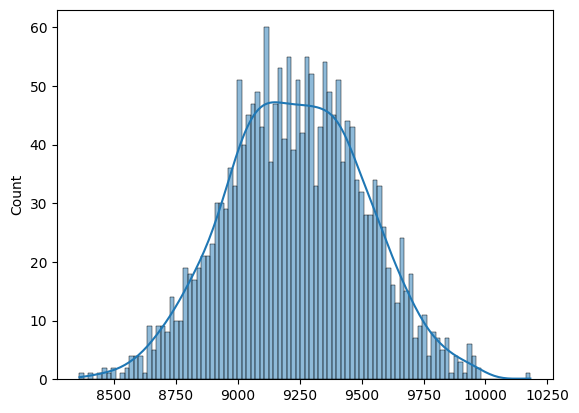

In [ ]:
# Lets plot the sampling distrbution graph of sampling mean and lets repeat the experiment 2000 times
#with sample size 3000
s_mean18=[]
for i in range(2000):
  sample_mean18=Age_35['Purchase'].sample(300).mean()
  s_mean18.append(sample_mean18)

sns.histplot(data=s_mean18,bins=100,kde=True)

In [ ]:
#lets calculate the 95% C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate18=Age_35['Purchase'].sample(n2).mean()
std_error18=std_dev_35/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate18,scale=std_error18)

(9012.7110429043, 9360.186290429034)

In [ ]:
#lets calculate the 95% C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate19=Age_35['Purchase'].sample(n3).mean()
std_error19=std_dev_35/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate19,scale=std_error19)

(9152.645839364552, 9262.527160635447)

In [ ]:
Age_45=walmart[walmart['Age']=="36-45"]
std_dev_45=Age_45['Purchase'].std()

In [ ]:
#lets calculate the 95% C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate20=Age_45['Purchase'].sample(n1).mean()
std_error20=std_dev_45/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate20,scale=std_error20)

(8550.902743753062, 9647.99725624694)

In [ ]:
#lets calculate the 95% C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate21=Age_45['Purchase'].sample(n2).mean()
std_error21=std_dev_45/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate21,scale=std_error21)

(9165.350793269032, 9512.282540064303)

In [ ]:
#lets calculate the 95% C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate22=Age_45['Purchase'].sample(n3).mean()
std_error22=std_dev_45/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate22,scale=std_error22)

(9298.270141041972, 9407.979592291362)

In [ ]:
Age_50=walmart[walmart['Age']=="46-50"]
std_dev_50=Age_50['Purchase'].std()

In [ ]:
#lets calculate the 95% C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate23=Age_50['Purchase'].sample(n1).mean()
std_error23=std_dev_50/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate23,scale=std_error23)

(8560.369613078923, 9643.510386921078)

In [ ]:
#lets calculate the 95% C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate24=Age_50['Purchase'].sample(n2).mean()
std_error24=std_dev_50/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate24,scale=std_error24)

(9057.93007306974, 9400.449260263595)

In [ ]:
#lets calculate the 95% C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate25=Age_50['Purchase'].sample(n2).mean()
std_error25=std_dev_50/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate25,scale=std_error25)


(9175.032627974559, 9283.346705358776)

In [ ]:
Age_55=walmart[walmart['Age']=="51-55"]
std_dev_55=Age_55['Purchase'].std()

In [ ]:
#lets calculate the 95% C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate26=Age_55['Purchase'].sample(n1).mean()
std_error26=std_dev_55/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate26,scale=std_error26)

(9176.7836860995, 10279.769647233834)

In [ ]:
#lets calculate the 95% C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate27=Age_55['Purchase'].sample(n2).mean()
std_error27=std_dev_55/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate27,scale=std_error27)

(9353.474273447942, 9702.26905988539)

In [ ]:
#lets calculate the 95% C.I with sample size 30000
#Sample Size n3=30000
np.random.seed(123)
point_estimate28=Age_55['Purchase'].sample(n3).mean()
std_error28=std_dev_55/np.sqrt(n3)
norm.interval(confidence=0.95,loc=point_estimate28,scale=std_error28)

(9459.461001943284, 9569.759598056717)

In [ ]:
Age_55_Plus=walmart[walmart['Age']=="55+"]
std_dev_55_Plus=Age_55_Plus['Purchase'].std()

In [ ]:
#lets calculate the 95% C.I with sample size 300
#Sample Size n1=300
np.random.seed(123)
point_estimate29=Age_55_Plus['Purchase'].sample(n1).mean()
std_error29=std_dev_55_Plus/np.sqrt(n1)
norm.interval(confidence=0.95,loc=point_estimate29,scale=std_error29)

(8583.31260719707, 9665.094059469597)

In [ ]:
#lets calculate the 95% C.I with sample size 3000
#Sample Size n2=3000
np.random.seed(123)
point_estimate30=Age_55_Plus['Purchase'].sample(n2).mean()
std_error30=std_dev_55_Plus/np.sqrt(n2)
norm.interval(confidence=0.95,loc=point_estimate30,scale=std_error30)

(9176.119334014704, 9518.208665985298)

<font color=orange># **SUMMARY OF C.I @ 95% for different Age Groups:**

Average amount spent by age group 0-17 with 95% confidence is in the range 8847-9200

Average amount spent by age group 18-25 with 95% confidence is in the range 9063 - 9413

Average amount spent by age group 26-35 with 95% confidence is in the range 9152 - 9262

Average amount spent by age group 36-45 with 95% confidence is in the range 9298 - 9407

Average amount spent by age group 46-50 with 95% confidence is in the range 9175 - 9283

Average amount spent by age group 51-55 with 95% confidence is in the range
9459 -  9569

Average amount spent by age group 55+  with 95% confidence is in the range 9176 - 9518



<font color=pink> So it clearly visible that average spending overlap for age groups 18-25 & 26-35


<font color=pink> So it clearly visible that average spending overlap for age groups 18-25 & 26-35 and also for age group 51-55 and 55+




# **<Font color=orange>SUMMARY REPORT**


<font color=pink>MALES VS FEMALES

*   Based on the Central Limit Theorem (CLT) calculations, we found that the confidence intervals for the average spending of males and females do not overlap
*   This indicates that there is a difference in the average spending between males and females

<font color=pink>MARRIED VS SINGLES



*   Utilizing the CLT calculations, we observed that the confidence intervals for the average spending of married and unmarried individuals do overlap.
*   This suggests that there is not a significant difference in the average spending between married and unmarried individuals.

<font color=pink>AGE GROUPS



*   Through CLT analysis, it was determined that the confidence intervals for the average spending of different age groups do overlap.

*   This implies that there is not a significant difference in the average spending among different age groups



#<Font color=orange>RECOMMENDATIONS : Leveraging Conclusions for Changes or Improvements:

<Font color=orange>Males vs. Females:

Actionable Insights: If the confidence intervals do not overlap, it suggests that there might  be a  difference in spending habits between genders.

  If the intervals do not overlap, it indicates a potential opportunity to target specific products or promotions towards the gender with higher average spending.Walmart can tailor its marketing strategies to better resonate with the preferences and behaviors of male and female shoppers. This might involve developing gender-specific advertising campaigns, utilizing language and imagery that appeals to each demographic, and showcasing products that are popular among male or female customers.

<Font color=orange>Married vs. Unmarried:

Actionable Insights: Similar to the gender analysis, if the confidence intervals overlap, it implies that there might not be a significant difference in spending habits between married and unmarried individuals.

Walmart can consider offering products and promotions that cater to the needs of both groups.

<Font color=orange>Different Age Groups:

Actionable Insights: If the confidence intervals overlap, it suggests that there might not be a significant difference in spending habits among different age groups.

Walmart can focus on offering a diverse range of products and promotions that cater to various age demographics.

By leveraging these conclusions, Walmart can refine its marketing strategies, product offerings, and promotions to better meet the diverse needs and preferences of its customer base, ultimately driving sales and improving customer satisfaction.











